## Derivative models

We will implement an algorithm to calculate the price of a European call by mean of the Binomial Tree valuation model. For this purpose, firstly we initialize the next parameters:

In [203]:
import math
import numpy as np
import matplotlib.pyplot as plt

class binomial_tree:
    def __init__(self,K,T,S,r,N,u,d):
        self.K = K
        self.T = T
        self.S = S
        self.r = r
        self.N = N
        self.u = u
        self.d = d
        self.dt = self.T/self.N
        self.p = (math.exp(self.r*self.dt)-self.d)/(self.u-self.d)
        self.disc = math.exp(-self.r*self.dt)

    def asset_prices_at_maturity_time_step_N(self):
        St=np.empty(self.N+1)
        St[0]=self.S*pow(self.d,self.N)
        for j in range(self.N):
            St[j+1]=(St[j]*self.u/self.d)
        return St

    def option_values_at_maturity(self):
        St=self.asset_prices_at_maturity_time_step_N()
        C=np.empty(self.N+1)
        for j in range(self.N+1):
            C[j]=max(0.0, St[j]-self.K)
        return C

    def europeanCall(self):
        C=self.option_values_at_maturity()
        for i in range(self.N-1):  
            i=self.N-1-i
            #Variable i counts the step backward at which we will calculate the calls C_{i,j}
            for j in range(i):
                C[j]=self.disc*(self.p*C[j+1]+(1-self.p)*C[j])
        return C[0]

    def show(self):
        description="""
        Binomial tree model for valuate an European call option with strike price {strike},
        maturity date {maturity}, initial stock price {stockPrice}, interest market rate {rate},
        steps at maturity {steps}, upward rate of the asset {upwardRate}, and downward rate {downwardRate}.
        
        """.format(strike=str(self.K),maturity=str(self.T),stockPrice=str(self.S),
                   rate=str(self.r),steps=str(self.N),upwardRate=str(self.u),
                   downwardRate=str(self.d))
        print(description)

def plot_euCall_vs_strikePrices(T,S,r,N=20,u=1.1,d=0.9091,grid_size=1000,bound=10):
    f = lambda k: binomial_tree(k,T,S,r,N,u,d)
    domain = [k*bound/grid_size for k in range(grid_size)]
    image = [f(k).europeanCall() for k in domain]
    fig,ax = plt.subplots()
    ax.plot(domain, image)
    plt.ylabel("Call option")
    plt.xlabel("Strike price")
    plt.show()

def plot_euCall_vs_maturityDate(K,S,r,N=20,u=1.1,d=0.9091,grid_size=1000,bound=10):
    f = lambda t: binomial_tree(K,t,S,r,N,u,d)
    domain = [t*bound/grid_size for t in range(grid_size)]
    image = [f(t).europeanCall() for t in domain]
    fig,ax = plt.subplots()
    ax.plot(domain, image)
    plt.ylabel("Call option")
    plt.xlabel("Maturity date")
    plt.show()

def plot_euCall_vs_initialAssetPrice(K,T,r,N=20,u=1.1,d=0.9091,grid_size=1000,bound=10):
    f = lambda s: binomial_tree(K,T,s,r,N,u,d)
    domain = [s*bound/grid_size for s in range(grid_size)]
    image = [f(s).europeanCall() for s in domain]
    fig,ax = plt.subplots()
    ax.plot(domain, image)
    plt.ylabel("Call option")
    plt.xlabel("Initial stock price")
    plt.show()

In [147]:
myEurOption = binomial_tree(100,1,100,0.06,20,1.1,0.9091)

In [141]:
myEurOption.show()


        Binomial tree model for valuate an European call option with strike price 100,
        maturity date 1, initial stock price 100, interest market rate 0.06,
        steps at maturity 10, upward rate of the asset 1.1, and downward rate 0.9091.
        
        


In [148]:
myEurOption.europeanCall()

13.33094340710822

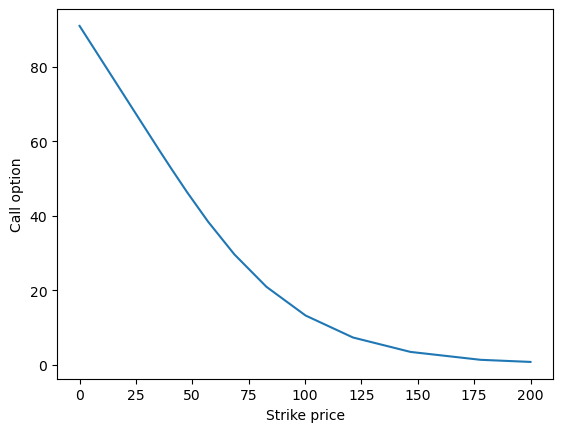

In [205]:
plot_euCall_vs_strikePrices(1,100,0.06,N=20,u=1.1,d=0.9091,grid_size=20000,bound=200)

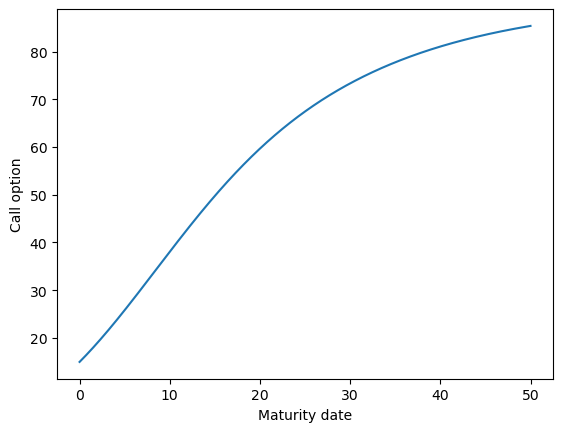

In [209]:
plot_euCall_vs_maturityDate(100,100,0.06,N=30,u=1.1,d=0.9091,grid_size=20000,bound=50)

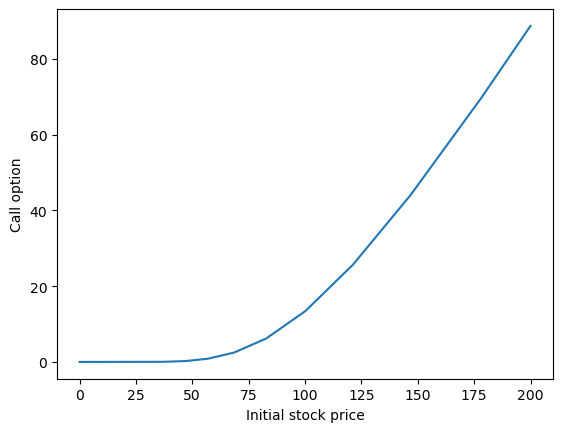

In [208]:
plot_euCall_vs_initialAssetPrice(100,1,0.06,N=20,u=1.1,d=0.9091,grid_size=20000,bound=200)